# Podcast web scraping visualizations

<p>This Jupyter Notebook calls in a web scraping module and a podcast cleaning module. In each of the different sections, visualizations are created to gain insights into which podcast genres are most popular and which networks are most successful at creating and producing content.</p>
<br>
</br>


<p> In addition, this notebook evaluates which metrics are most correlated to podcast rank, and attempts to generate a custom metric that identifies podcasts that have loyal listeners yet may not have the largest fanbases.</p>

## Use module to scrape website

In [1]:
import podcast_scraper

In [90]:
podcast_scraper.get_podcast_ranks(200,'spotify') # get all spotify ranks
podcast_scraper.get_podcast_ranks(250,'apple') # get all apple ranks

In [ ]:
podcast_scraper.get_podcast_ranks(100,'spotify') #get top 100 podcasts on spotify
podcast_scraper.get_podcast_info('spotify_100_ranks.csv') #get all data for top 100 podcasts on spotify

## Load libraries for analyses

In [1]:
import podcast_cleaning as pod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
spotify_ranks = pd.read_csv('spotify_200_ranks.csv')
apple_ranks = pd.read_csv('apple_250_ranks.csv')
podcast_ranks = spotify_ranks.merge(apple_ranks, how = 'inner', on = ['name','date_scraped','network','url'])

In [101]:
#function determines if a podcast rank for Apple is significantly different than for Spotify
pod.test_rankings(podcast_ranks,1000)

No significant difference in rank across platforms!


0.2094947485589353

In [3]:
spotify = pod.chartable_merge('spotify_100_ranks.csv','podcast_data.csv')
spotify.sample(5)

,spotify_rank,name,network,date_scraped,genres,stars,ratings,episode_date,episode_day_of_week,num_episodes,first_archived_episode,days_since_first,days_since_update
9064,4,NPR News Now,NPR,2021-02-14,"[News, Daily News]",4.4,10213.0,2019-11-14,Thursday,11263,2018-06-12,978,458
43834,81,Ologies with Alie Ward,Alie Ward,2021-02-14,"[Comedy, Science]",4.9,17369.0,2021-01-26,Tuesday,187,2017-09-04,1259,19
40434,72,Lore,Aaron Mahnke and Grim & Mild,2021-02-14,"[Society & Culture, History]",4.6,48560.0,2019-03-04,Monday,168,2015-03-18,2160,713
3603,4,NPR News Now,NPR,2021-02-14,"[News, Daily News]",4.4,10213.0,2020-10-08,Thursday,11263,2018-06-12,978,129
23172,31,The Bill Simmons Podcast,The Ringer & Bill Simmons,2021-02-14,"[TV & Film, Sports]",4.5,30125.0,2016-05-25,Wednesday,696,2015-09-25,1969,1726


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48020 entries, 0 to 48019
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   spotify_rank            48020 non-null  int64         
 1   name                    48020 non-null  object        
 2   network                 48020 non-null  object        
 3   date_scraped            48020 non-null  datetime64[ns]
 4   genres                  48020 non-null  object        
 5   stars                   47810 non-null  float64       
 6   ratings                 47810 non-null  float64       
 7   episode_date            48020 non-null  datetime64[ns]
 8   episode_day_of_week     48020 non-null  object        
 9   num_episodes            48020 non-null  int64         
 10  first_archived_episode  48020 non-null  datetime64[ns]
 11  days_since_first        48020 non-null  int64         
 12  days_since_update       48020 non-null  int64 

In [4]:
#create DataFrame of top ranked podcasts and their most recently released episode
spotify_latest = spotify.loc[spotify.groupby('name')['days_since_update'].idxmin()]
spotify_latest.sort_values(by = 'spotify_rank').head(5)

,spotify_rank,name,network,date_scraped,genres,stars,ratings,episode_date,episode_day_of_week,num_episodes,first_archived_episode,days_since_first,days_since_update
0,1,The Joe Rogan Experience,Joe Rogan,2021-02-14,"[Comedy, Society & Culture]",4.7,261344.0,2020-11-27,Friday,940,2009-12-24,4070,79
940,2,The Daily,The New York Times,2021-02-14,"[News, Daily News]",4.5,94378.0,2021-02-12,Friday,1097,2017-01-17,1489,2
2037,3,Crime Junkie,audiochuck,2021-02-14,[True Crime],4.8,295796.0,2021-02-08,Monday,193,2017-12-06,1166,6
2230,4,NPR News Now,NPR,2021-02-14,"[News, Daily News]",4.4,10213.0,2021-02-14,Sunday,11263,2018-06-12,978,0
13493,5,Up First,NPR,2021-02-14,"[News, Daily News]",4.6,46293.0,2021-02-13,Saturday,1153,2018-06-05,985,1


In [9]:
np.sum(spotify_latest.isnull())

spotify_rank              0
name                      0
network                   0
date_scraped              0
genres                    0
stars                     4
ratings                   4
episode_date              0
episode_day_of_week       0
num_episodes              0
first_archived_episode    0
days_since_first          0
days_since_update         0
dtype: int64

<p>Four podcasts have missing stars and ratings.</p>

## Remove na values for correlations

In [5]:
spotify_noNA = spotify.copy().dropna(axis = 0, how = 'any')

Text(0.5,1,'Correlations between podcast data and Spotify rank')

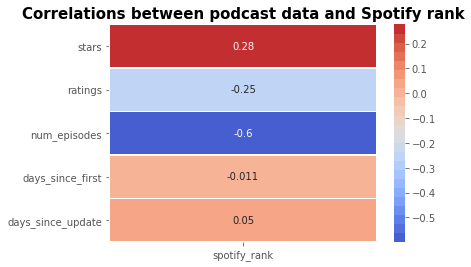

In [6]:
r = spotify_noNA.corr()
colormap = sns.color_palette('coolwarm',24)
sns.heatmap(r[['spotify_rank']][1:],annot = True,cmap = colormap,linewidths = 0.3)
plt.title('Correlations between podcast data and Spotify rank',fontsize = 15, fontweight = 'bold')

<p> NPR News Now has over 10,000 episodes archived, significantly more than any other podcast </p>

Text(0.5,1,'Correlations between podcast data and Spotify rank')

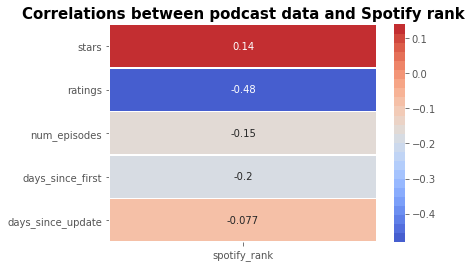

In [80]:
r_adj = spotify_noNA.loc[spotify_noNA.name != 'NPR News Now'].copy().corr()
sns.heatmap(r_adj[['spotify_rank']][1:],annot = True,cmap = colormap,linewidths = 0.3)
plt.title('Correlations between podcast data and Spotify rank',fontsize = 15, fontweight = 'bold')

<p> Removing the outlier greatly reduces the correlation of num_episodes to rank </p>

## Generate custom metric

In [33]:
spotify_noNA['success_metric'] = spotify_noNA['stars']**2/np.log(spotify_noNA['ratings'])

In [34]:
metric_top10 = spotify_noNA.groupby('name')['spotify_rank','stars','ratings','success_metric'].mean()
metric_top10 = metric_top10.sort_values(by = 'success_metric',ascending = False).head(15)
metric_top10

/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,spotify_rank,stars,ratings,success_metric
name,,,,
Sol Good Sounds,30,4.7,6.0,12.328664
Office Ladies,18,3.9,9.0,6.922369
VIEWS with David Dobrik and Jason Nash,17,4.1,13.0,6.553736
Behind the Bastards,96,3.2,6.0,5.715053
SmartLess,73,4.9,85.0,5.404431
The Daily Shine,90,4.9,86.0,5.390240
Taurus Today,43,4.8,86.0,5.172475
Relaxing White Noise,22,4.6,62.0,5.127044
Libra Today,49,4.7,94.0,4.862110


<p> While the metric did include podcasts outside the top 10, rank may be the best way to target podcasts for advertisements.</p>

Text(0.5,1,'Generated metric compares to other data collected')

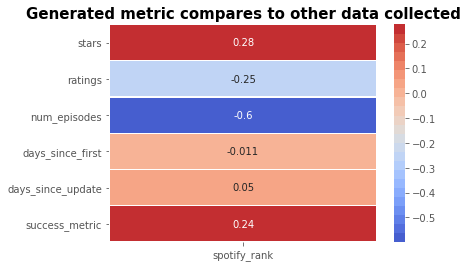

In [35]:
metric_included = spotify_noNA.corr()
sns.heatmap(metric_included[['spotify_rank']][1:],annot = True,cmap = colormap,linewidths = 0.3)
plt.title('Generated metric compares to other data collected',fontsize = 15, fontweight = 'bold')

## Analyze episodes released by day of week

Text(0.5,1,'Number of episodes released by day of week')

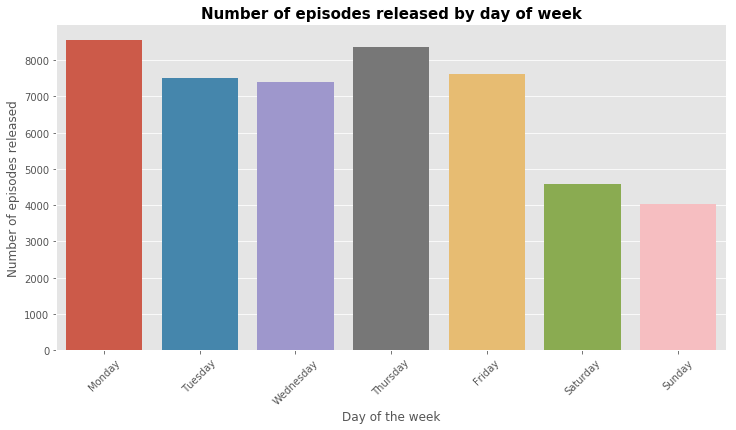

In [104]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_released = spotify.groupby('episode_day_of_week')['episode_date'].count().reset_index()
day_released.columns = ['ep_day_names','count']
day_released['ep_day_names'] = pd.Categorical(day_released['ep_day_names'], categories = day_order, ordered = True)
day_released = day_released.sort_values('ep_day_names')
plt.figure(figsize = (12,6))
sns.barplot(data= day_released,x = 'ep_day_names', y = 'count')
plt.xticks(rotation = 45)
plt.xlabel('Day of the week')
plt.ylabel('Number of episodes released')
plt.title('Number of episodes released by day of week',fontsize = 15, fontweight = 'bold')

## Analyze podcasts by genre

In [67]:
genre_analysis = spotify.copy()

# unpack podcast w/ multiple genres into separate rows
genre_analysis= pod.list_unpacking(genre_analysis,'genres')


#Create DataFrame of each podcast and unpacked genres by their most recent episode
genre_unique = genre_analysis.loc[genre_analysis.groupby(['name','genre'])['days_since_update'].idxmin()]

Text(0.5,1,'Top 10 genres by number of episodes')

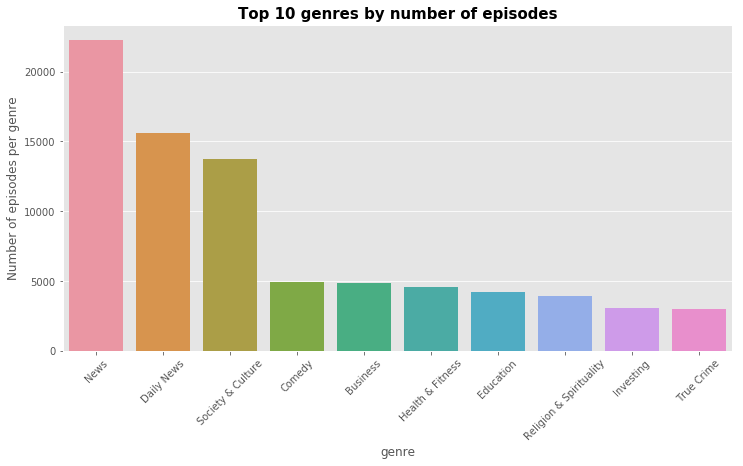

In [68]:
genre_count = genre_unique.groupby('genre')['num_episodes'].agg('sum').reset_index()
genre_count = genre_count.sort_values(by = 'num_episodes',ascending = False).head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = 'genre', y = 'num_episodes', data = genre_count)
plt.xticks(rotation = 45)
plt.ylabel('Number of episodes per genre')
plt.title('Top 10 genres by number of episodes',fontsize = 15, fontweight = 'bold')

Text(0.5,1,'Top 10 genres by average stars out of 5')

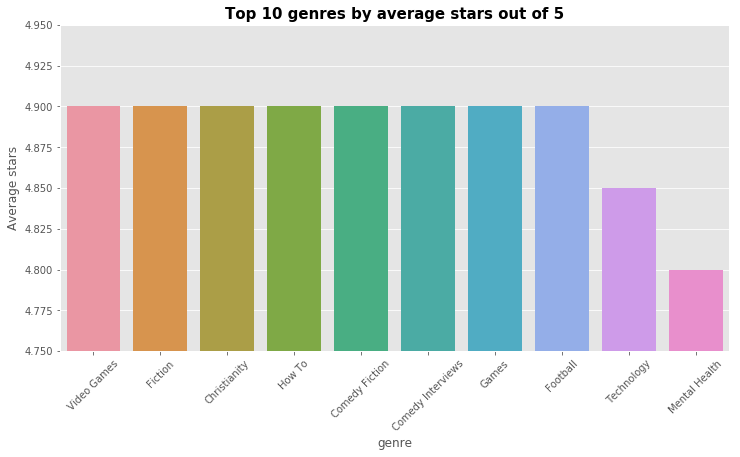

In [58]:
avg_stars = genre_unique.groupby('genre')[['stars']].mean()
avg_stars = avg_stars.sort_values(by = 'stars',ascending = False).reset_index().head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = 'genre', y = 'stars', data = avg_stars)
plt.xticks(rotation = 45)
plt.ylim([4.75,4.95])
plt.ylabel('Average stars')
plt.title('Top 10 genres by average stars out of 5',fontsize = 15, fontweight = 'bold')

Text(0.5,1,'Top 10 genres by count')

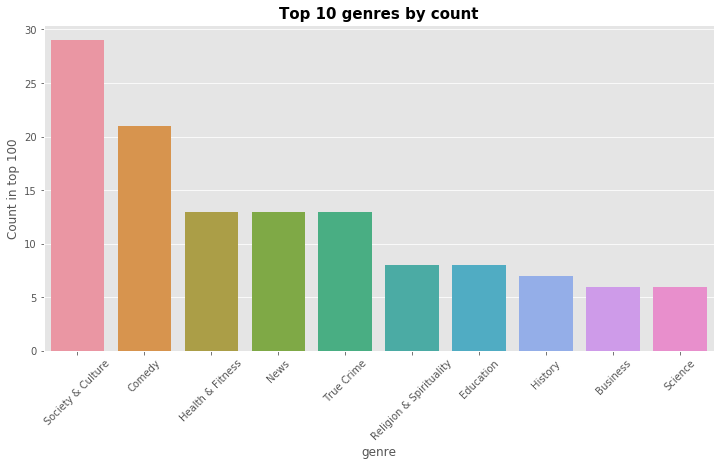

In [59]:
num_genre = genre_unique.groupby('genre')[['stars']].count()
num_genre = num_genre.sort_values(by = 'stars',ascending = False).reset_index().head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = 'genre', y = 'stars', data = num_genre)
plt.xticks(rotation = 45)
plt.ylabel('Count in top 100')
plt.title('Top 10 genres by count',fontsize = 15, fontweight = 'bold')

## Analyze podcasts by network

In [49]:
network = spotify_latest.groupby('network')[['num_episodes']].count().reset_index()
network = network.sort_values(by = 'num_episodes',ascending = False)
network = network.loc[network.num_episodes > 1]

Text(0.5,1,'Top networks by count')

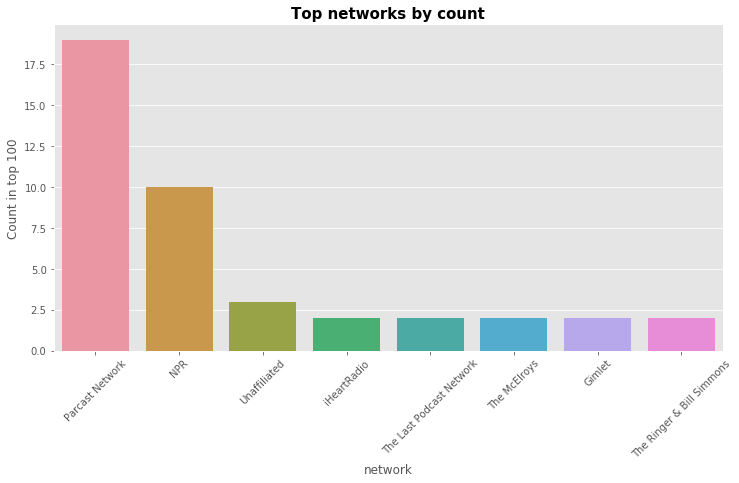

In [60]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'network', y = 'num_episodes', data = network)
plt.xticks(rotation = 45)
plt.ylabel('Count in top 100')
plt.title('Top networks by count',fontsize = 15, fontweight = 'bold')

Text(0.5,1,'Top 10 networks by episodes produced')

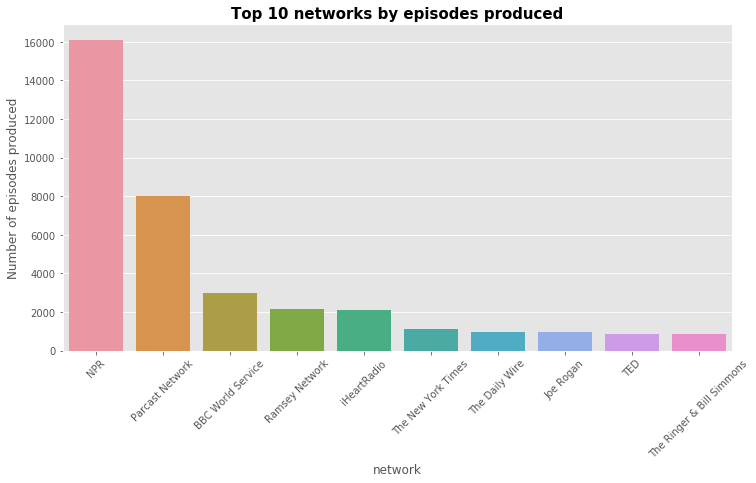

In [63]:
network_eps = spotify_latest.groupby('network')[['num_episodes']].sum().reset_index()
network_eps = network_eps.sort_values(by = 'num_episodes',ascending = False)
network_eps = network_eps.head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = 'network', y = 'num_episodes', data = network_eps)
plt.xticks(rotation = 45)
plt.ylabel('Number of episodes produced')
plt.title('Top 10 networks by episodes produced',fontsize = 15, fontweight = 'bold')